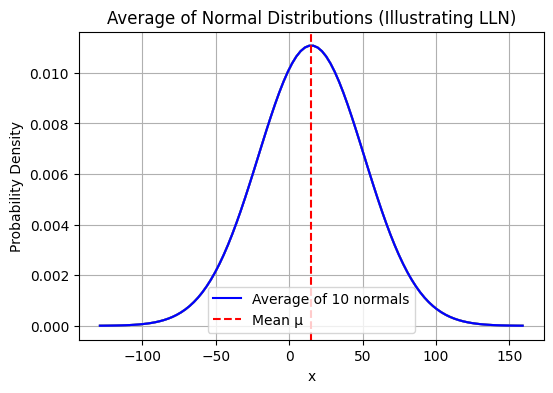

In [1]:
# LLN simulation: averaging multiple normal distributions
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Function to generate x values and corresponding normal PDF values
def normal_XY(mu, sigma):
    xs = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  # range around mean
    ys = norm.pdf(xs, mu, sigma)                       # normal PDF
    return xs, ys

# Parameters
mu, sigma = 15, 36
n_distributions = 10   # number of normal curves to average

# Prepare x-axis and accumulator for summed densities
xs, _ = normal_XY(mu, sigma)
ys_sum = np.zeros_like(xs)

# Plot each normal distribution in light grey
fig, ax = plt.subplots(figsize=(6,4))
for i in range(n_distributions):
    _, ys = normal_XY(mu, sigma)
    ys_sum += ys                      # accumulate densities
    ax.plot(xs, ys, color='gray', alpha=0.3, label='_nolegend_')

# Compute and plot the average distribution
ys_avg = ys_sum / n_distributions
ax.plot(xs, ys_avg, color='b', label=f'Average of {n_distributions} normals')

# Add vertical line at the true mean
ax.axvline(mu, color='r', linestyle='--', label='Mean μ')

# Labels, grid, and legend
ax.grid(True)
ax.set_title("Average of Normal Distributions (Illustrating LLN)")
ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.legend()

# Save high-resolution figure and display
fig.savefig('img/lln_simulation.png', dpi=300, bbox_inches='tight')
plt.show()
